<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker*

## Notebook 8: Basics of Pandas for data analysis
In this Notebook we learn how to do basic data analysis with `pandas`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Loading data with Pandas
Data is often stored in CSV files (Comma Separated Values, although the values can be separated by other things than commas).
So far, we have loaded csv files with the `np.loadtxt` command.
The `loadtxt` function has some basic functionality and works just fine, but when we have more elaborate data sets we want more sophisticated functionality. 
The most powerful and advanced package for data handling and analysis is called `pandas`, and is commonly imported as `pd`:

In [2]:
import pandas as pd

We will use only a few functions of the `pandas` package here. Full information on `pandas` can be found on the [pandas website](http://pandas.pydata.org/). 
Consider the following dataset, which is stored in the file `transport.csv`. It shows the percentage of transportation kilometers by car, bus or rail for four countries. The dataset has four columns. 

`country, car, bus, rail`  
`some more explanations, yada yada yada`  
`France, 86.1, 5.3, 8.6`  
`Germany, 85.2, 7.1, 7.7`  
`Netherlands, 86.4, 4.6, 9`  
`United Kingdom, 88.2, 6.5, 5.3` 

This data file can be loaded with the `read_csv` function of the `pandas` package. The `read_csv` function has many options. We will use three of them here. The rows that need to be skipped are defined with the `skiprows` keyword (in this case row 1 with the `yada yada` text). The `skipinitialspace` keyword is set to `True` so that the column name ' car' is loaded without the initial space that is in the data file. And the `index_col` keyword is set to indicate that the names in column 0 can be used as an index to select a row.

In [3]:
tran = pd.read_csv('transport.csv', skiprows=[1], skipinitialspace=True, index_col=0)

`pandas` loads data into a `DataFrame`. A `DataFrame` is like an array, but has many additional features for data analysis. For starters, once you have loaded the data, you can print it to the screen

In [4]:
print(tran)

                 car  bus  rail
country                        
France          86.1  5.3   8.6
Germany         85.2  7.1   7.7
Netherlands     86.4  4.6   9.0
United Kingdom  88.2  6.5   5.3


When the `DataFrame` is large, you can still print it to the screen (`pandas` is smart enough not to show the entire DataFrame when it is very large), or you can simply print the first 5 lines of the `DataFrame` with the `.head()` function. 

A better option is the `display` function to display a nicely formatted `DataFrame` to the screen. 

In [5]:
display(tran)

,car,bus,rail
country,,,
France,86.1,5.3,8.6
Germany,85.2,7.1,7.7
Netherlands,86.4,4.6,9.0
United Kingdom,88.2,6.5,5.3


### Basic `DataFrame` manipulation
The rows and columns of a `DataFrame` may have names, as for the `tran` `DataFrame` shown above. To find out which names are used for the columns, use the `keys` function, which is accessible with the dot syntax. You can loop through the names of the columns.

In [6]:
print('Names of columns:')
print(tran.keys())
for key in tran.keys():
    print(key)

Names of columns:
Index(['car', 'bus', 'rail'], dtype='object')
car
bus
rail


Each `DataFrame` may be indexed just like an array, by specifying the row and column number using the `.iloc` syntax (which stands for *index location*), where column 0 is the column labeled `car` (the column labeled as `country` was stored as an index when reading the csv file).

In [7]:
print(tran.iloc[0, 1])  # gives the bus data for France
print(tran.iloc[1, 0])  # gives the car data for Germany
print(tran.iloc[2, 2])  # gives the rail data for Netherlands
print(tran.iloc[3])     # all data for United Kindom
print(tran.iloc[:, 1])  # all data for bus

5.3
85.2
9.0
car     88.2
bus      6.5
rail     5.3
Name: United Kingdom, dtype: float64
country
France            5.3
Germany           7.1
Netherlands       4.6
United Kingdom    6.5
Name: bus, dtype: float64


Alternatively, and often more explicit, values in a `DataFrame` may be selected by specifying the indices by name, using the `.loc` syntax. This is a bit more typing but it is *much* more clearly what you are doing. The equivalent of the code cell above, but using indices by name is

In [8]:
print(tran.loc['France', 'bus'])
print(tran.loc['Germany', 'car'])
print(tran.loc['Netherlands', 'rail'])
print(tran.loc['United Kingdom'])
print(tran.loc[:, 'bus'])

5.3
85.2
9.0
car     88.2
bus      6.5
rail     5.3
Name: United Kingdom, dtype: float64
country
France            5.3
Germany           7.1
Netherlands       4.6
United Kingdom    6.5
Name: bus, dtype: float64


There are two alternative ways to access all the data in a column. First, you can simply specify the column name as an index, without having to use the `.loc` syntax. Second, the dot syntax may be used by typing `.column_name`, where `column_name` is the name of the column. Hence, the following three are equivalent

In [9]:
print(tran.loc[:, 'car'])  # all rows of 'car' column
print(tran['car'])        # 'car' column
print(tran.car)

country
France            86.1
Germany           85.2
Netherlands       86.4
United Kingdom    88.2
Name: car, dtype: float64
country
France            86.1
Germany           85.2
Netherlands       86.4
United Kingdom    88.2
Name: car, dtype: float64
country
France            86.1
Germany           85.2
Netherlands       86.4
United Kingdom    88.2
Name: car, dtype: float64


If you want to access the data in a row, only the `.loc` notation works

In [10]:
tran.loc['France']

car     86.1
bus      5.3
rail     8.6
Name: France, dtype: float64

### `numpy` functions for DataFrames
`DataFrame` objects can often be treated as arrays, especially when they contain data. Most `numpy` functions work on `DataFrame` objects, but they can also be accessed with the *dot* syntax, like `dataframe_name.function()`. Simply type 

`tran.` 

in a code cell and then hit the [tab] key to see all the functions that are available (there are many). In the code cell below, we compute the maximum value of transportation by car, the country corresponding to the maximum value of transportation by car (in `pandas` this is `idxmax` rather than the `argmax` used in `numpy`), and the mean value of all transportation by car. 

In [11]:
print('maximum car travel percentage:', tran.car.max())
print('country with maximum car travel percentage:', tran.car.idxmax())
print('mean car travel percentage:', tran.car.mean())

maximum car travel percentage: 88.2
country with maximum car travel percentage: United Kingdom
mean car travel percentage: 86.47500000000001


You can also find all values larger than a specified value, just like for arrays.

In [12]:
print('all rail travel above 8 percent:')
print(tran.rail[tran.rail > 8])

all rail travel above 8 percent:
country
France         8.6
Netherlands    9.0
Name: rail, dtype: float64


The code above identified France and Netherlands as the countries with more than 8% transport by rail, but the code returned a series with the country names and the value in the rail column. If you only want the names of the countries, you need to ask for the values of the index column

In [13]:
print(tran.index[tran.rail > 8].values)

['France' 'Netherlands']


### Exercise 1. <a name="back1"></a>Average annual rainfall by country
The file `annual_precip.csv` contains the average yearly rainfall and total land area for all the countries in the world (well, there are some missing values);  the data is available on the website of the <a href="http://data.worldbank.org/">world bank</a>. Open the data file to see what it looks like (just click on it in the Files tab on the Jupyter Dashboard). Load the data with the `read_csv` function of `pandas`, making sure that the names of the countries can be used to select a row, and perform the following tasks:

* Print the first 5 lines of the `DataFrame` to the screen with the `.head()` function.
* Print the average annual rainfall for Panama and make sure to include the units.
* Report the total land area of the Netherlands and make sure to include the units.
* Report all countries with an average annual rainfall less than 200 mm/year
* Report all countries with an average annual rainfall more than 2500 mm/year
* Report all countries with an average annual rainfall that is within 50 mm/year of the average annual rainfall in the Netherlands

<a href="#ex1answer">Answers to Exercise 1</a>

### Adding a column to a `DataFrame`
A column may be added to a `DataFrame` by simply specifying the name and values of the new column using the syntax `DataFrame['newcolumn']=something`. For example, let's add a column named `public_transport`, which is the sum of the `bus` and `rail` columns, and then find the country with the largest percentage of public transport

In [14]:
tran['public_transport'] = tran.bus + tran.rail
print('Country with largest percentage public transport:', tran.public_transport.idxmax())

Country with largest percentage public transport: Germany


### Plotting DataFrames
You can plot the column or row of a DataFrame with `matplotlib` functions, as we have done in previous Notebooks, but `pandas` has also implemented its own, much more convenient, plotting functions (still based on `matplotlib` in the background, of course). The plotting capabilities of `pandas` use the *dot* syntax, like `dataframe.plot()`. All columns can be plotted simultaneously (note that the names appear on the axes and the legend is added automatically!).

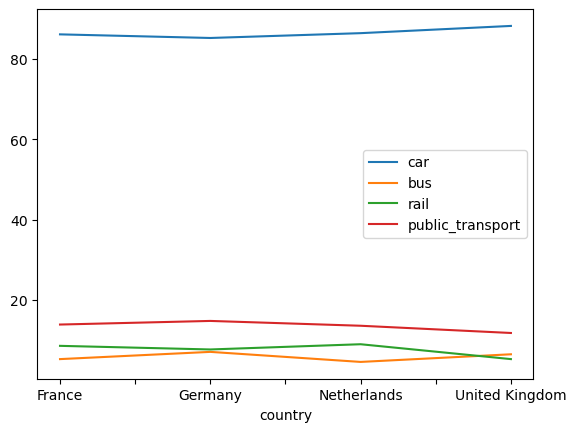

In [15]:
tran.plot();  # plot all columns

You can also plot one column at a time. The style of the plot may be specified with the `kind` keyword (the default is `'line'`). Check out `tran.plot?` for more options. 

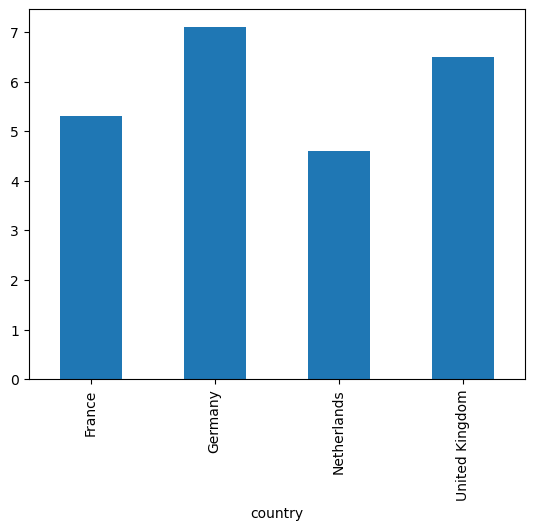

In [16]:
tran['bus'].plot(kind='bar');

### Sorting DataFrames
DataFrames may be sorted with the `.sort_values` function. The keyword `inplace=True` replaces the values in the DataFrame with the new sorted values (when `inplace=False` a new DataFrame is returned, which you can store in a separate variable so that you have two datasets, one sorted and one unsorted). The `sort_values` function has several keyword arguments, including `by` which is either the name of one column to sort by or a list of columns so that data is sorted by the first column in the list and when values are equal they are sorted by the next column in the list. Another keyword is `ascending`, which you can use to specify whether to sort in ascending order (`ascending=True`, which is the default), or descending order (`ascending=False`)

In [17]:
print('Data sorted by car use:')
display(tran.sort_values(by='car'))
print('Data sorted by bus use:')
display(tran.sort_values(by='bus'))

Data sorted by car use:


,car,bus,rail,public_transport
country,,,,
Germany,85.2,7.1,7.7,14.8
France,86.1,5.3,8.6,13.9
Netherlands,86.4,4.6,9.0,13.6
United Kingdom,88.2,6.5,5.3,11.8


Data sorted by bus use:


,car,bus,rail,public_transport
country,,,,
Netherlands,86.4,4.6,9.0,13.6
France,86.1,5.3,8.6,13.9
United Kingdom,88.2,6.5,5.3,11.8
Germany,85.2,7.1,7.7,14.8


### Renaming columns
Sometimes (quite often, really), the names of columns in a dataset are not very convenient (long, including spaces, etc.). For the example of the transportation data, the columns have convenient names, but let's change them for demonstration purposes. You can rename columns inplace, and you can change as many columns as you want. The old and new names are specified with a Python dictionary. A dictionary is a very useful data type. It is specified between braces `{}`, and links a word in the dictionary to a value. The value can be anything. You can then use the word in the dictionary as the index, just like you would look up a word in an paper dictionary.

In [18]:
firstdictionary = {'goals': 20, 'city': 'Delft'}
print(firstdictionary['goals'])
print(firstdictionary['city'])

20
Delft


Much more on Python dictionaries can be found, for example, [here](https://www.w3schools.com/python/python_dictionaries.asp). Let's continue with renaming two of the columns of the `tran` `DataFrame`: 

In [19]:
tran.rename(columns={'bus': 'BUS',
                     'rail': 'train'}, inplace=True)
display(tran)

,car,BUS,train,public_transport
country,,,,
France,86.1,5.3,8.6,13.9
Germany,85.2,7.1,7.7,14.8
Netherlands,86.4,4.6,9.0,13.6
United Kingdom,88.2,6.5,5.3,11.8


The index column, with the countries, is now called `'country'`, but we can rename that too, for example to `'somewhere in Europe'`, with the following syntax

In [20]:
tran.index.names = ['somewhere in Europe']
display(tran)

,car,BUS,train,public_transport
somewhere in Europe,,,,
France,86.1,5.3,8.6,13.9
Germany,85.2,7.1,7.7,14.8
Netherlands,86.4,4.6,9.0,13.6
United Kingdom,88.2,6.5,5.3,11.8


### Exercise 2. <a name="back2"></a>Average annual rainfall by country continued
Continue with the average yearly rainfall and total land area for all the countries in the world and perform the following tasks:

* Add a new column that stores the total average annual freshwater influx in km$^3$/year for each country. Make sure you convert your units correctly. 
* Sort the data on the total average annual freshwater influx in ascending order and report the 5 countries with the largest annual freshwater influx using the `iloc` syntax. 
* Make a bar graph of the 10 countries with the largest annual freshwater influx.

<a href="#ex2answer">Answers to Exercise 2</a>

### Time series data
In time series data, one of the columns represents dates, sometimes including times, together referred to as datetimes. `pandas` can be used to read csv files where one of the columns includes datetime data. You need to tell `pandas` which column contains datetime values and `pandas` will try to convert that column to datetime objects. Datetime objects are very convenient as specifics of the datetime object may be assessed with the dot syntax: `.year` returns the year, `.month` returns the month, etc.

For example, consider the following data stored in the file `timeseries1.dat`

`date, conc`  
`2014-04-01, 0.19`   
`2014-04-02, 0.23`   
`2014-04-03, 0.32`   
`2014-04-04, 0.29`   

The file may be read with `read_csv` using the keyword `parse_dates=[0]` so that column number 0 is converted to datetimes

In [21]:
data = pd.read_csv('timeseries1.dat', parse_dates=[0], skipinitialspace=True)
display(data)

,date,conc
0,2014-04-01,0.19
1,2014-04-02,0.23
2,2014-04-03,0.32
3,2014-04-04,0.29
4,2014-04-05,0.32


The rows of the DataFrame `data` are numbered, as we have not told `pandas` what column to use as the index of the rows (we will do that later). The first column of the DataFrame `data` has datetime values. We can access, for example, the year, month, and day with the dot syntax

In [22]:
print('datetime of row 0:', data.iloc[0, 0])
print('year  of row 0:', data.iloc[0, 0].year)
print('month of row 0:', data.iloc[0, 0].month)
print('day   of row 0:', data.iloc[0, 0].day)

datetime of row 0: 2014-04-01 00:00:00
year  of row 0: 2014
month of row 0: 4
day   of row 0: 1


You can get part of the date from an entire column (so for all rows) using the `.dt` syntax

In [23]:
data.date.dt.day # day for entire date column

0    1
1    2
2    3
3    4
4    5
Name: date, dtype: int32

Time series data may also contain the time in addition to the date. For example, the data of the file `timeseries2.dat`, shown below, contains the day and time. You can access the `hour` or `minutes`, but also the time of a row of the DataFrame with the `.time()` function.

`date, conc`   
`2014-04-01 12:00:00, 0.19`   
`2014-04-01 13:00:00, 0.20`  
`2014-04-01 14:00:00, 0.23`  
`2014-04-01 15:00:00, 0.21` 

In [24]:
data2 = pd.read_csv('timeseries2.dat', parse_dates=[0], skipinitialspace=True)
display(data2)
print('hour  of row 0:', data2.iloc[0, 0].hour)
print('minute  of row 0:', data2.iloc[0, 0].minute)
print('time of row 0:', data2.iloc[0, 0].time())

,date,conc
0,2014-04-01 12:00:00,0.19
1,2014-04-01 13:00:00,0.20
2,2014-04-01 14:00:00,0.23
3,2014-04-01 15:00:00,0.21


hour  of row 0: 12
minute  of row 0: 0
time of row 0: 12:00:00


### Setting values based on a condition
Values of a column may be changed based on a condition. For example, all values of the concentration above 0.2 may be set to 0.2 with the following syntax

In [25]:
data2.loc[data2.conc>0.2, 'conc'] = 0.2
display(data2)

,date,conc
0,2014-04-01 12:00:00,0.19
1,2014-04-01 13:00:00,0.20
2,2014-04-01 14:00:00,0.20
3,2014-04-01 15:00:00,0.20


### Exercise 3,  <a name="back3"></a>Load and plot daily rainfall
Rainfall data for the Netherlands may be obtained from the website of the Royal Dutch Meteorological Society <A href="https://climexp.knmi.nl/selectdailyseries.cgi?id=someone@somewhere">KNMI</A> . Daily rainfall for the weather station Rotterdam in 2012 is stored in the file `rotterdam_rainfall_2012.txt`. First open the file in a text editor to see what the file looks like. At the top of the file, an explanation is given of the data in the file. Read this. Load the data file with the `read_csv` function of `pandas`. Use the keyword `skiprows` to skip all rows except for the row with the names of the columns. Use the keyword `parse_dates` to give either the name or number of the column that needs to be converted to a datetime. Don't forget the `skipinitialspace` keyword, else the names of the columns may start with a bunch of spaces. Perform the following tasks:
* Convert the rainfall data to mm/d.
* Some rainfall values in the dataset may be -1 (read the header of the file to learn why); set all rainfall values that are less than zero to zero. 
* Use the `plot` function of `pandas` to create a line plot of the daily rainfall with the number of the day (so not the date) along the horizontal axis. 
* Use `matplotlib` functions to add labels to the axes and set the limits along the horizontal axis from 0 to 365. 
* Determine the maximum daily rainfall and the date of the maximum daily rainfall and print them to the screen.

<a href="#ex3answer">Answers to Exercise 3</a>

### Exercise 4,  <a name="back4"></a>Compute monthly rainfall from daily rainfall
In this exercise we are going to compute the total monthly rainfall for 2012 in the City of Rotterdam using the daily rainfall measurements we loaded in the previous Exercise. Later on in this Notebook we learn convenient functions from `pandas` to do this, but here we are going to do this with a loop. Create an array of 12 zeros to store the monthly totals and loop through all the days in 2012 to compute the total rainfall for each month. The month associated with each row of the DataFrame may be obtained with the `.month` syntax, as shown above. Print the monthly totals (in mm/month) to the screen and create a bar graph of the total monthly rainfall (in mm/month) vs. the month using the `plt.bar` function of matplotlib. 

<a href="#ex4answer">Answers to Exercise 4</a>

### Date times as index
The datetime of a dataset may also be used as the index of a DataFrame by specifying the column with the dates as the column to use for an index with the `index_col` keyword.  Note that datetimes are given as year-month-day, so `2012-04-01` means April 1, 2012.

In [26]:
data = pd.read_csv('timeseries1.dat', parse_dates=[0], index_col=0)
display(data)
print('data on April 1:', data.loc['2014-04-01'])
print('data on April 2:', data.loc['2014-04-02'])

,conc
date,
2014-04-01,0.19
2014-04-02,0.23
2014-04-03,0.32
2014-04-04,0.29
2014-04-05,0.32


data on April 1: conc    0.19
Name: 2014-04-01 00:00:00, dtype: float64
data on April 2: conc    0.23
Name: 2014-04-02 00:00:00, dtype: float64


### Resampling
DataFrames have a very powerful feature called resampling. Downsampling refers to going from high frequency to low frequency. For example, going from daily data to monthly data. Upsampling refers to going from low frequency to high frequency. For example going from monthly data to daily data. For both upsampling and downsampling, you need to tell `pandas` how to perform the resampling. Here we discuss downsampling, where we compute monthly totals from daily values. First we load the daily rainfall in Rotterdam in 2012 from the file `rotterdam_rainfall_2012.txt` and specify the dates as the index (this is the column labeled as YYYYMMDD). We resample the rain to monthly totals using the `resample` function. You have to tell the `resample` function to what frequency it needs to resample. Common ones are `'A'` for yearly, `'M'` for monthly, `'W'` for weekly, `'D'` for daily, and `'H'` for hourly, but there are many other ones (see  [here](http://pandas.pydata.org/pandas-docs/version/0.12.0/timeseries.html)). The keyword argument `kind` is used to tell `pandas` where to assign the computed values to. You can assign the computed value to the last day of the period, or the first day, or to the entire period (in this case the entire month). The latter is done by specifying `kind='period'`, which is what we will do here.  Finally, you need to specify how to resample. This is done by adding a `numpy` function at the end of the resample statement, like

    dataframe.resample(...).npfunc()
    
where `npfunc` can be any `numpy` function like `mean` for the mean (that is the default), `sum` for the total, `min`, `max`, etc. Calculating the monthly totals and making a bar graph can now be done with `pandas` as follows. 

YYYYMMDD
2012-01     83.0
2012-02     24.3
2012-03     21.9
2012-04     57.6
2012-05     76.5
2012-06    119.0
2012-07    121.6
2012-08     93.4
2012-09     52.0
2012-10    132.6
2012-11     63.3
2012-12    149.5
Freq: M, Name: RH, dtype: float64

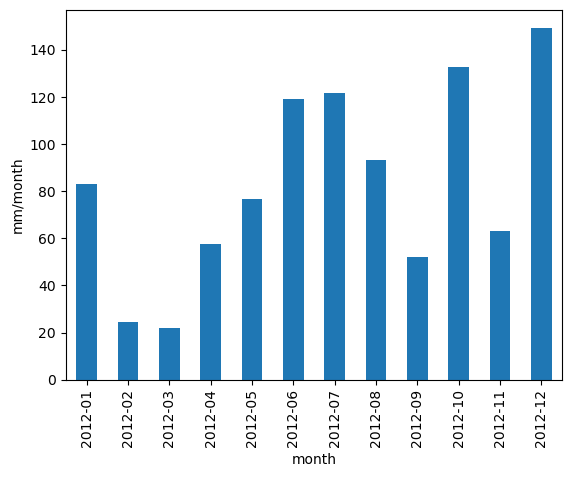

In [27]:
rain = pd.read_csv('rotterdam_rainfall_2012.txt', skiprows=9,
                parse_dates=['YYYYMMDD'], index_col='YYYYMMDD',
                skipinitialspace=True)
rain.loc[rain["RH"] < 0, "RH"] = 0  # remove negative values
rain.RH = rain.RH * 0.1 # convert to mm/day
monthlyrain = rain.RH.resample('ME').sum().to_period()
display(monthlyrain)
monthlyrain.plot(kind='bar')
plt.ylabel('mm/month')
plt.xlabel('month');

### Exercise 5,<a name="back5"></a> Resample weather data
The file `rotterdam_weather_2000_2010.txt` contains daily weather data at the weather station Rotterdam for the period 2000-2010 (again from the KNMI). Open the data file in an editor to see what is in it. Perform the following tasks:
* Load the data making sure the dates are used as index. 
* Convert the rain and evaporation to mm/day, and the temperature to degrees Celcius. 
* Set any negative rainfall (explained in the file) to zero. 
* Compute total yearly rainfall, total yearly evaporation, and mean yearly temperature. 
* Make a line plot of the yearly rainfall, yearly evaporation, and mean yearly temperature using the `plot` function of `pandas`. Plot the mean temperature on the secondary $y$-axis (use the help function to find out how). 

<a href="#ex5answer">Answers to Exercise 5</a>

### Rolling mean or rolling total
The `resample` method resamples to, for example, weeks, one week at a time. The `rolling` method performs a similar computation for a moving window, where the first argument is the length of the moving window. For example, a 30 day rolling total rainfall first computes the total rainfall in the first 30 days, from day 0 till day 30, then from day 1 till day 31, from day 2 till 32, etc. The value can be assigned to the end of the rolling period, or to the center of the rolling period (by setting `center=True`). The monthly total rainfall and 30-day rolling total are compared in the figure below.

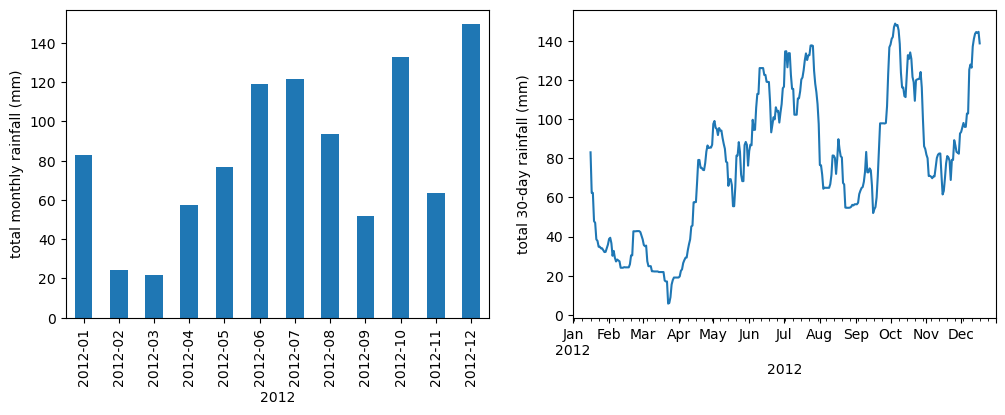

In [28]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
monthlyrain.plot(kind='bar')
plt.xlabel('2012')
plt.ylabel('total monthly rainfall (mm)')
plt.subplot(122)
rain.RH.rolling(30, center=True).sum().plot()
plt.xlabel('2012')
plt.ylabel('total 30-day rainfall (mm)');

### Solutions to the exercises

<a name="ex1answer">Answers to Exercise 1</a>

In [29]:
rain = pd.read_csv('annual_precip.csv', skiprows=2, index_col=0)
#
print('First five lines of rain dataset:')
display(rain.head())
#
print()
print('Average annual rainfall in Panama is',rain.loc['Panama','precip'],'mm/year')
#
print()
print('Land area of the Netherlands is', rain.loc['Netherlands','area'], 'thousand km^2')
#
print()
print('Countries where average rainfall is below 200 mm/year')
display(rain[ rain.precip < 200 ])
#
print()
print('Countries where average rainfall is above 2500 mm/year')
display(rain[ rain.precip > 2500 ])
#
print()
print('Countries with almost the same rainfall as Netherlands')
display(rain[abs(rain.loc['Netherlands','precip'] - rain.precip) < 50])

First five lines of rain dataset:


,precip,area
country,,
Afghanistan,327.0,652.2
Albania,1485.0,27.4
Algeria,89.0,2381.7
American Samoa,NaN,0.2
Andorra,NaN,0.5



Average annual rainfall in Panama is 2692.0 mm/year

Land area of the Netherlands is 33.7 thousand km^2

Countries where average rainfall is below 200 mm/year


,precip,area
country,,
Algeria,89.0,2381.7
Bahrain,83.0,0.8
"Egypt, Arab Rep.",51.0,995.5
Jordan,111.0,88.8
Kuwait,121.0,17.8
Libya,56.0,1759.5
Mauritania,92.0,1030.7
Niger,151.0,1266.7
Oman,125.0,309.5



Countries where average rainfall is above 2500 mm/year


,precip,area
country,,
Bangladesh,2666.0,130.2
Brunei Darussalam,2722.0,5.3
Colombia,2612.0,1109.5
Costa Rica,2926.0,51.1
Fiji,2592.0,18.3
Indonesia,2702.0,1811.6
Malaysia,2875.0,328.6
Panama,2692.0,74.3
Papua New Guinea,3142.0,452.9



Countries with almost the same rainfall as Netherlands


,precip,area
country,,
Burkina Faso,748.0,273.6
Lesotho,788.0,30.4
Mexico,752.0,1944.0
Netherlands,778.0,33.7
Slovak Republic,824.0,48.1
Swaziland,788.0,17.2


<a href="#back1">Back to Exercise 1</a>

<a name="ex2answer">Answers to Exercise 2</a>

Five countries with largest annual influx:


,precip,area,totalq
country,,,
Brazil,1782.0,8459.4,15074.6508
Russian Federation,460.0,16376.9,7533.3740
United States,715.0,9147.4,6540.3910
China,645.0,9327.5,6016.2375
Indonesia,2702.0,1811.6,4894.9432


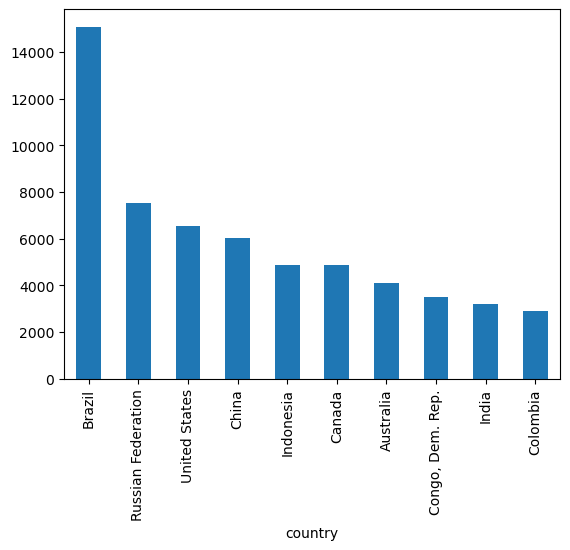

In [30]:
rain['totalq'] = rain.precip * rain.area * 1e-3
#
print('Five countries with largest annual influx:')
rain.sort_values(by='totalq', ascending=False, inplace=True)
display(rain[:5])
#
rain.totalq[:10].plot(kind='bar');

<a href="#back2">Back to Exercise 2</a>

<a name="ex3answer">Answers to Exercise 3</a>

Maximum daily rainfall 22.400000000000002
Date of maximum daily rainfall 2012-12-22 00:00:00


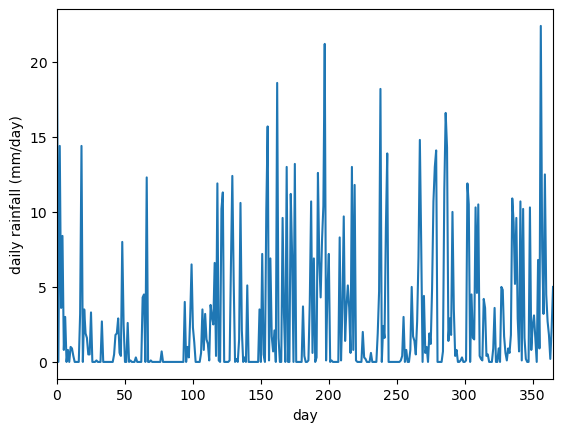

In [31]:
rain = pd.read_csv('rotterdam_rainfall_2012.txt', skiprows=9,
                parse_dates=['YYYYMMDD'], skipinitialspace=True)
# convert to mm/d
rain["RH"] = rain["RH"].multiply(0.1)
# set negative values to zero
rain.loc[rain.RH < 0, 'RH'] = 0
rain.RH.plot()
plt.xlabel('day')
plt.ylabel('daily rainfall (mm/day)')
plt.xlim(0, 365)
print('Maximum daily rainfall', rain.RH.max())
print('Date of maximum daily rainfall', rain.YYYYMMDD[rain.RH.idxmax()])

<a href="#back3">Back to Exercise 3</a>

<a name="ex4answer">Answers to Exercise 4</a>

[ 83.   24.3  21.9  57.6  76.5 119.  121.6  93.4  52.  132.6  63.3 149.5]


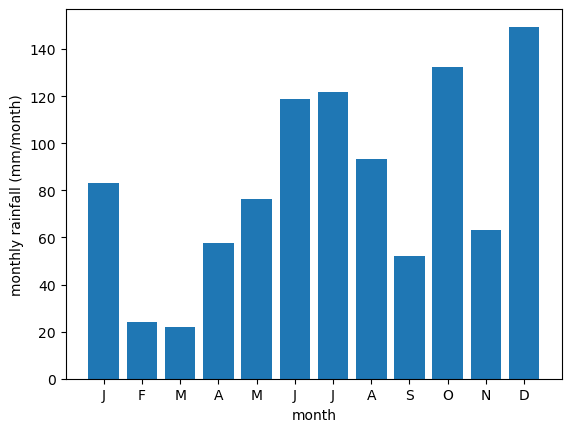

In [32]:
monthlyrain = np.zeros(12)
for i in range(len(rain)):
    month = rain.iloc[i,1].month
    monthlyrain[month - 1] += rain.iloc[i, 2]
print(monthlyrain)
#
plt.bar(np.arange(12), monthlyrain, width=0.8)
plt.xlabel('month')
plt.ylabel('monthly rainfall (mm/month)')
plt.xticks(np.arange(12), ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']);

<a href="#back4">Back to Exercise 4</a>

<a name="ex5answer">Answers to Exercise 5</a>

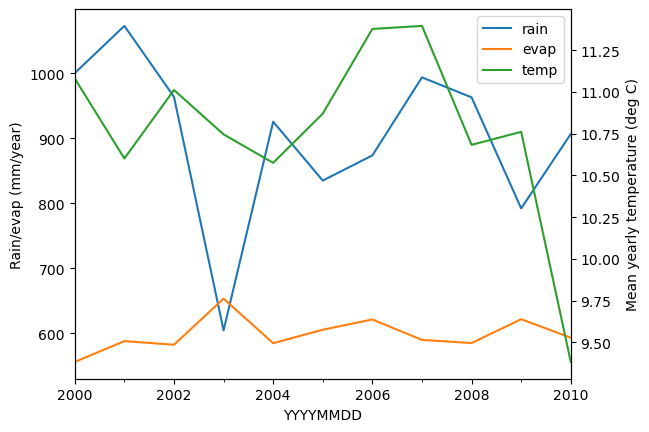

In [33]:
weather = pd.read_csv('rotterdam_weather_2000_2010.txt', skiprows=11,
                parse_dates=['YYYYMMDD'], index_col='YYYYMMDD', skipinitialspace=True)
weather.TG = 0.1 * weather.TG
weather.RH = 0.1 * weather.RH
weather.EV24 = 0.1 * weather.EV24
weather.loc[weather.RH < 0, 'RH'] = 0
yearly_rain = weather.RH.resample('YE').sum()
yearly_evap = weather.EV24.resample('YE').sum()
yearly_temp = weather.TG.resample('YE').mean()
ax1 = yearly_rain.plot()
ax1 = yearly_evap.plot()
plt.ylabel('Rain/evap (mm/year)')
ax2 = yearly_temp.plot(secondary_y=True)
plt.xlabel('Year')
plt.ylabel('Mean yearly temperature (deg C)')
plt.legend(ax1.get_lines() + ax2.get_lines(),
           ['rain', 'evap', 'temp'], loc='best');

<a href="#back5">Back to Exercise 5</a>